### Analysis Tasks

#### Basic Statistics tasks

    1. Which store has maximum sales

    2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

    3. Which store/s has good quarterly growth rate in Q3’2012

    4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

    5. Provide a monthly and semester view of sales in units and give insights

### Statistical Model

For Store 1 – Build  prediction models to forecast demand

    6. Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

    7. Change dates into days by creating new variable.

    8. Select the model which gives best accuracy.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings

In [6]:
warnings.filterwarnings('ignore')

In [7]:
%matplotlib inline

In [8]:
df=pd.read_csv("Walmart_Store_sales.csv")

In [9]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [11]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [12]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.shape

(6435, 8)

In [15]:
df.size

51480

In [16]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


#### 1.Which store has maximum sales

In [18]:
df.groupby('Store')['Weekly_Sales'].sum().idxmax()

20

In [19]:
df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)[:1]

Store
20    301397792.0
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

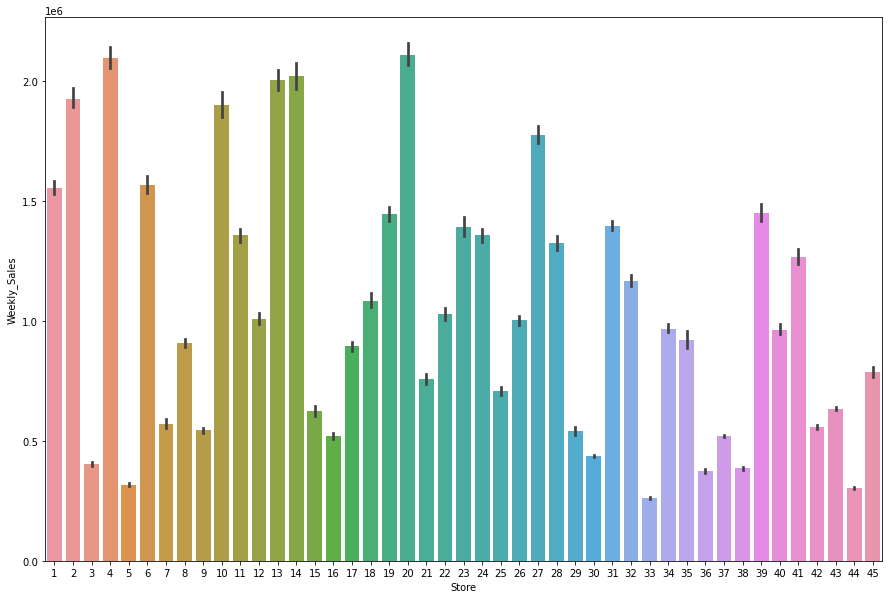

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(x="Store",y="Weekly_Sales",data=df)

In [21]:
# store number 20 has maximum weekly sales

#### 2.Which store has maximum standard deviation

In [22]:
df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)[0:1]

Store
14    317569.949476
Name: Weekly_Sales, dtype: float64

In [23]:
# store 14 has maximum Standard Deviation 

In [24]:
df[df["Store"]==14]['Weekly_Sales']

1859    2623469.95
1860    1704218.84
1861    2204556.70
1862    2095591.63
1863    2237544.75
           ...    
1997    1522512.20
1998    1687592.16
1999    1639585.61
2000    1590274.72
2001    1704357.62
Name: Weekly_Sales, Length: 143, dtype: float64

#### 3.find out the coefficient of mean to standard deviation

In [25]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [26]:
coefficient=(1.046965e+06/5.643666e+05)*100

In [27]:
coefficient

185.51150971726537

#### 4.Which store has good quarterly growth rate in Q3’2012

In [28]:
df.info() # the data column is in object form so have to concert into date formate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [29]:
df['Date']=pd.to_datetime(df['Date'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [31]:
unique_dates=np.unique(df['Date'])

In [32]:
# creation of new columns from date column
df['Year']=pd.DatetimeIndex(df['Date']).year
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Day']=pd.DatetimeIndex(df['Date']).day

In [33]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day'],
      dtype='object')

In [34]:
df_2012=df.loc[df['Year']==2012]

In [35]:
df_2012_Q3=df_2012.loc[(df['Month']>6) & (df['Month']<10)]
df_2012_Q2=df_2012.loc[(df['Month']>3) & (df['Month']<7)]
df_2012_Q2

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,2012,6,1
113,1,2012-06-04,1899676.88,0,70.43,3.891,221.435611,7.143,2012,6,4
114,1,2012-04-13,1621031.70,0,69.07,3.891,221.510210,7.143,2012,4,13
115,1,2012-04-20,1521577.87,0,66.76,3.877,221.564074,7.143,2012,4,20
116,1,2012-04-27,1468928.37,0,67.23,3.814,221.617937,7.143,2012,4,27
...,...,...,...,...,...,...,...,...,...,...,...
6415,45,2012-06-15,821498.18,0,71.93,3.620,191.029973,8.567,2012,6,15
6416,45,2012-06-22,822569.16,0,74.22,3.564,191.064610,8.567,2012,6,22
6417,45,2012-06-29,773367.71,0,75.22,3.506,191.099246,8.567,2012,6,29
6418,45,2012-06-07,843361.10,0,82.99,3.475,191.133883,8.684,2012,6,7


In [36]:
df_2012_Q3

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
109,1,2012-09-03,1675431.16,0,58.76,3.669,221.059189,7.348,2012,9,3
122,1,2012-08-06,1697230.96,0,78.30,3.452,221.749484,7.143,2012,8,6
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908,2012,7,13
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,2012,7,20
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,2012,7,27
...,...,...,...,...,...,...,...,...,...,...,...
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684,2012,8,31
6427,45,2012-07-09,766512.66,1,75.70,3.911,191.577676,8.684,2012,7,9
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684,2012,9,14
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684,2012,9,21


In [37]:
df_2012_2=df_2012_Q2.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

In [38]:
df_2012_3=df_2012_Q3.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

In [39]:
growth=df_2012_3-df_2012_2

In [40]:
growth.sort_values()

Store
14   -4287338.66
20   -2884242.51
4    -2732065.81
2    -2688256.00
13   -2483231.20
10   -2429077.48
1    -2403755.60
27   -2402402.62
6    -2387749.05
28   -1930340.28
31   -1794826.89
11   -1784732.70
19   -1670937.25
24   -1642192.12
22   -1510521.06
45   -1427657.73
12   -1415856.54
17   -1384893.64
34   -1381769.00
18   -1327184.36
39   -1291630.46
32   -1273071.37
40   -1202086.08
41   -1186447.44
23   -1179770.54
8    -1060415.27
15    -958577.86
25    -938026.75
29    -906631.12
9     -903080.57
43    -863066.64
21    -822771.63
26    -800714.31
42    -777407.45
37    -609253.88
30    -604361.01
38    -603065.06
3     -596172.23
5     -546640.33
36    -512255.32
35    -501448.29
33    -335065.62
44    -302069.32
7     -291200.00
16    -184822.33
Name: Weekly_Sales, dtype: float64

In [41]:
# there is no gain in any store

#### 5.Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [42]:
p=df.loc[df['Holiday_Flag']==0]['Weekly_Sales'].mean()
p

1041256.3802088564

In [43]:
result=df[(df['Weekly_Sales']>p)&(df['Holiday_Flag']==1)]

In [44]:
result

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010,10,9
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11,26
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12,31
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011,11,2
...,...,...,...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759,2011,12,30
5825,41,2012-10-02,1238844.56,1,22.00,3.103,196.919506,6.589,2012,10,2
5855,41,2012-07-09,1392143.82,1,67.41,3.596,198.095048,6.432,2012,7,9
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,2010,11,26


In [45]:
result['Date'].unique

<bound method Series.unique of 1      2010-12-02
31     2010-10-09
42     2010-11-26
47     2010-12-31
53     2011-11-02
          ...    
5819   2011-12-30
5825   2012-10-02
5855   2012-07-09
6334   2010-11-26
6386   2011-11-25
Name: Date, Length: 220, dtype: datetime64[ns]>

In [46]:
Super_Bowl = [ '12-Feb-10', '11-Feb-11', '10-Feb-12', '8-Feb-13']
Labour_Day = ['10-Sep-10', '9-Sep-11',' 7-Sep-12', '6-Sep-13']
Thanksgiving = ['26-Nov-10', '25-Nov-11', '23-Nov-12', '29-Nov-13']
Christmas = ['31-Dec-10', '30-Dec-11', '28-Dec-12', '27-Dec-13']

In [47]:
Super_Bowl_Sales=df.loc[df['Date'].isin(Super_Bowl)]['Weekly_Sales'].mean()
Labour_Day_Sales=df.loc[df['Date'].isin(Labour_Day)]['Weekly_Sales'].mean()
Thanksgiving_Sales=df.loc[df['Date'].isin(Thanksgiving)]['Weekly_Sales'].mean()
Christmas_Sales=df.loc[df['Date'].isin(Christmas)]['Weekly_Sales'].mean()

In [48]:
pd.DataFrame([{'Super_Bowl_Sales':Super_Bowl_Sales,
              'Labour_Day_Sales':Labour_Day_Sales,
              'Thanksgiving_Sales':Thanksgiving_Sales,
              'Christmas_Sales':Christmas_Sales},{'p':p}]).T

,0,1
Super_Bowl_Sales,NaN,NaN
Labour_Day_Sales,1.039183e+06,NaN
Thanksgiving_Sales,1.471273e+06,NaN
Christmas_Sales,9.608331e+05,NaN
p,NaN,1.041256e+06


In [49]:
# only Thanksgiving_Sales are grater than non-holiday season sales

#### 6.Provide a monthly and semester view of sales in units and give insights

In [50]:
df['Semister']=np.where(df['Month']>7,1,2)

In [51]:
df.groupby(df['Semister']).mean()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
Semister,,,,,,,,,,
1,23.0,1.078900e+06,0.155172,60.636126,3.328449,171.682138,7.992160,2010.862069,9.896552,15.741379
2,23.0,1.025174e+06,0.011765,60.682654,3.379185,171.507604,8.003922,2011.035294,4.141176,15.588235


In [52]:
df.groupby(df['Semister']).count()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
Semister,,,,,,,,,,,
1,2610,2610,2610,2610,2610,2610,2610,2610,2610,2610,2610
2,3825,3825,3825,3825,3825,3825,3825,3825,3825,3825,3825


<AxesSubplot:xlabel='Semister', ylabel='Weekly_Sales'>

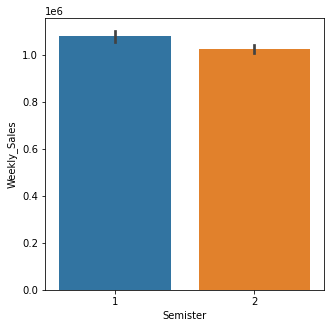

In [53]:
plt.figure(figsize=(5,5))
sns.barplot(x='Semister',y='Weekly_Sales',data=df)

#### 7.Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [54]:
df_store1=df[df['Store']==1]

In [55]:
df_store1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Semister
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2012,9,28,1
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573,2012,5,10,2
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573,2012,12,10,1
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10,19,1


In [56]:
from scipy import stats

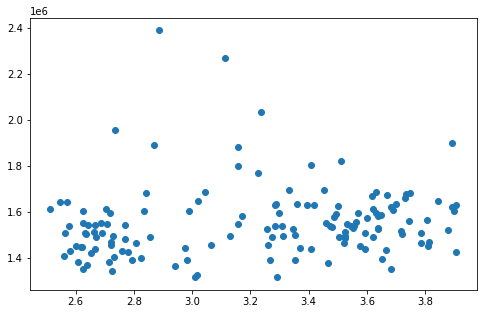

0.12459158039045631


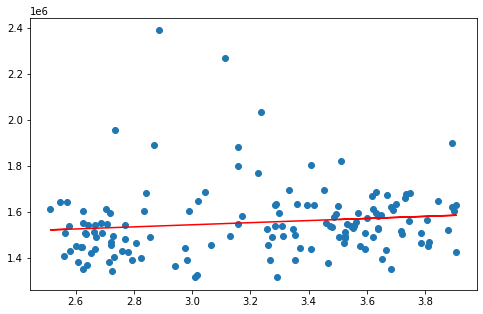

In [57]:
plt.figure(figsize=(8,5))
x=df_store1['Fuel_Price']
y=df_store1['Weekly_Sales']
plt.scatter(x,y)
plt.show()
plt.figure(figsize=(8,5))
slope,intercept,r,p,std_err=stats.linregress(x,y)
print(r)
def myfunc(x):
    return slope*x+intercept
mymodel=list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel,color='r')
plt.show()

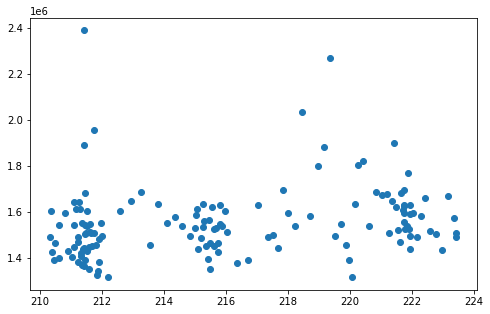

0.22540765942904453


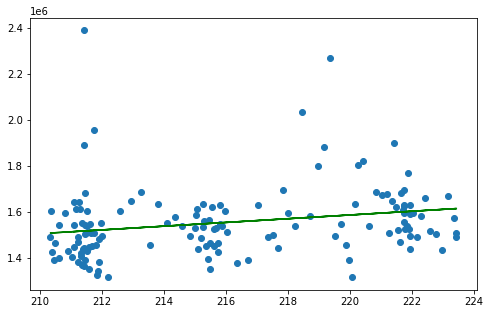

In [58]:
plt.figure(figsize=(8,5))
x=df_store1['CPI']
y=df_store1['Weekly_Sales']
plt.scatter(x,y)
plt.show()

plt.figure(figsize=(8,5))
slope,intercept,r,p,std_err=stats.linregress(x,y)
print(r)
def myfunc(x):
    return slope*x+intercept
mymodel=list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel,color='green')
plt.show()

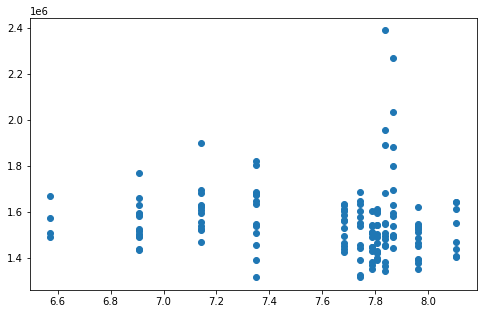

-0.09795539472957951


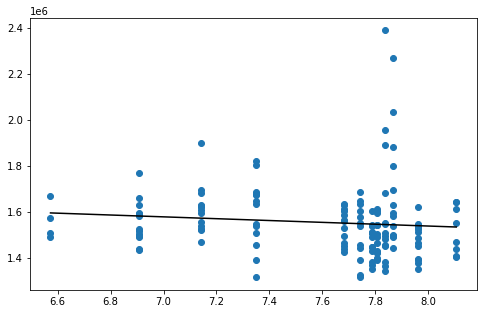

In [59]:
plt.figure(figsize=(8,5))
x=df_store1['Unemployment']
y=df_store1['Weekly_Sales']
plt.scatter(x,y)
plt.show()

plt.figure(figsize=(8,5))
slope,intercept,r,p,std_err=stats.linregress(x,y)
print(r)
def myfunc(x):
    return slope*x+intercept
mymodel=list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel,color='k')
plt.show()

In [60]:
X=df_store1[['Unemployment','CPI','Fuel_Price']]
y=df_store1['Weekly_Sales']

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [63]:
y_pred=model.predict(X_test)

In [64]:
predicted=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [65]:
predicted

,Actual,Predicted
117,1684519.99,1.564280e+06
19,1503284.06,1.523577e+06
82,1550229.22,1.528848e+06
97,1881176.67,1.570532e+06
56,1636263.41,1.519304e+06
12,1425100.71,1.509291e+06
131,1592409.97,1.574187e+06
65,1629391.28,1.512917e+06
66,1604775.58,1.514602e+06
18,1542561.09,1.522460e+06


#### 8. Change dates into days by creating new variable.

In [66]:
df['Day'].unique()

array([ 2, 19, 26,  3,  4, 16, 23, 30,  5, 14, 21, 28,  6, 18, 25,  7,  8,
       13, 20, 27,  9, 17, 24, 10, 15, 22, 29, 11, 12, 31,  1],
      dtype=int64)

In [67]:
df['Date'].dt.strftime('%d').unique()

array(['02', '19', '26', '03', '04', '16', '23', '30', '05', '14', '21',
       '28', '06', '18', '25', '07', '08', '13', '20', '27', '09', '17',
       '24', '10', '15', '22', '29', '11', '12', '31', '01'], dtype=object)

#### 9. Select the model which gives best accuracy.

In [68]:
from sklearn import metrics

In [69]:
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  115996.98583346052
MSE:  34746792222.784775
RMSE:  186404.91469589737


In [70]:
experiment_day_start=5
df_store1['date'] = pd.to_datetime(df_store1['Date'], dayfirst=True)
df_store1['exp_day'] = (df_store1['date']-df_store1['Date'].min()).dt.days + experiment_day_start

In [71]:
sort=df_store1.sort_values(by=['exp_day'])
sort

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Semister,date,exp_day
34,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838,2010,1,10,2,2010-01-10,5
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010,2,4,2,2010-02-04,30
21,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787,2010,2,7,2,2010-02-07,33
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2,2010-02-19,45
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2,2010-02-26,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1,2012-10-08,1592409.97,0,85.05,3.494,221.958433,6.908,2012,10,8,1,2012-10-08,1007
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10,19,1,2012-10-19,1018
142,1,2012-10-26,1493659.74,0,69.16,3.506,223.444251,6.573,2012,10,26,1,2012-10-26,1025
118,1,2012-11-05,1611096.05,0,73.77,3.688,221.725663,7.143,2012,11,5,1,2012-11-05,1035
